In [1]:
# Блокнот Puthon  для книги "Создаем нейронную сеть".
# Код для создания 3-слойной нейронной сети вместе с
# кодом для ее обучения с помощью набора данных MNIST.

# библиотека numpy
import numpy

# библиотека scipy.special содержит сигмоиду expit()
import scipy.special

# библиотека для графического отображения массивов
import matplotlib.pyplot
# гарантировать размещение графики в данном блокноте,
# а не в отдельном окне
%matplotlib inline

# опрееделение класса нейронной сети
class neuralNetwork:
    
    # инициализировать нейронную сеть
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # задать количество узлов во входном, скрытом и выходном слое
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # Матрицы весовых коэффициентов связей wih (между входным и скрытым)
        # слоями) и who (между скрытым и выходным слоями).
        # Весовые коэффициенты связей между узлом i и узлом j следующего слоя
        # обозначены как w_i_j:
        # w11 w21
        # w12 w22 и т.д.
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, - 0.5),\
                                       (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, - 0.5),\
                                       (self.onodes, self.hnodes))
        
        # коэффициент обучения
        self.lr = learningrate
        
        # Использование сигмоиды в качестве функции активации
        self.activation_function = lambda x: scipy.special.expit(x)
        self.inverse_activation_function = lambda x: scipy.special.logit(x)         
        pass
    
    # тренировка нейронной сети
    def train(self, inputs_list, targets_list):
        # преобразовать список значений в двухмерный массив
        inputs = numpy.array(inputs_list, ndmin = 2).T
        targets = numpy.array(targets_list, ndmin = 2).T
        
        # рассчитать входящие сигналы для скрытого слоя
        hidden_inputs = numpy.dot(self.wih, inputs)
        # рассчитать исходящие сигналы для скрытого слоя
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # рассчитать входящие сигналы для выходного слоя
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # рассчитать исходящие сигналы для выходного слоя
        final_outputs = self.activation_function(final_inputs)
        
        # ошибка выходного слоя =
        #целевое значение - фактическое значение)
        output_errors = targets - final_outputs
        
        # ошибки скрытого слоя - это ошибки output_errors,
        # распределенные пропорционально весовым коэффициентам связей
        # и рекомбинированные на скрытых узлах
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # обновить весовые коэффициенты связей между скрытым и выходным слоями
        self.who += self.lr * numpy.dot((output_errors * final_outputs * \
                    (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # обновить весовые коэффициенты связей между входным и скрытым слоями
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * \
                    (1.0 - hidden_outputs)), numpy.transpose(inputs))
        pass
    
    # опрос нейронной сети
    def query(self, inputs_list):
        # преодразовать список входных значений
        # в двухмерный массив
        inputs = numpy.array(inputs_list, ndmin = 2).T
        
        # рассчитать исходящие сигналы для скрытого слоя
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        # рассчитать исходящие сигналы для скрытого слоя
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # рассчитать входящие сигналы для выходного слоя
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        # рассчитать исходящие сигналы для выходного слоя
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    # обратный опрос нейронной сети
    # мы будем использовать одну и туже терминологию для каждого элемента,
    # например, target - это значения в правой части  сети, 
    # хотя и используемые в качестве входных данных
    # например hidden_output - это сигнал справа от средних узлов
    def backquery(self, targets_list):
        # преобразовать список targets в вертикальный массив
        final_outputs = numpy.array(targets_list, ndmin = 2).T
        
        # рассчитать входящие сигналы для выходного слоя
        final_inputs = self.inverse_activation_function(final_outputs)
        
        # рассчитать выходной сигнал для скрытого слоя
        hidden_outputs = numpy.dot(self.who.T, final_inputs)
        # масштабировать их уменьшив от 0,01 до 0,99
        hidden_outputs -= numpy.min(hidden_outputs)
        hidden_outputs /= numpy.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        
        # рассчитать входящий сигнал для скрытого слоя
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        
        # рассчитать выходной сигнал для входного слоя
        inputs = numpy.dot(self.wih.T, hidden_inputs)
        # масштабировать их уменьшив от 0,01 до 0,99
        inputs -= numpy.min(inputs)
        inputs /= numpy.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs
    
# количество входных, скрытых и выходных узлов
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# коэффициент обучения равен 0,1
learning_rate = 0.1

# создать экземпляр нейронной сети
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)


# загрузить в список тренировочный набор данных CSV-файла набора MNIST
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# тренирова нейронной сети

# переменная epochs указывает, сколько раз тренировочный
# набор данных используется для тренировки сети
epochs = 5

for e in range(epochs):
    # перебрать все записи в тренировочном наборе данных
    for record in training_data_list:
        # получить список значений, используя символы запятой (',')
        # в качестве разделителей
        all_values = record.split(',')
        # масштабировать и сместить входные значения
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # создать целевые выходные значения (все равны 0,01, за исключением
        # желаемого маркерного значения равного 0,99)
        targets = numpy.zeros(output_nodes) + 0.01
    
        # all_values[0] - целевое маркерное значение для данной записи
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

# загрузить в список тестовый набор данных CSV-файла набора MNIST
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# тестирование нейронной сети

# журнал оценок работы сети, первоначально пустой
scorecard = []

# перебрать все записи в тестовом наборе данных
for record in test_data_list:
    # получить список значений из записи, используя символы
    # запятой (',') в качестве разделителя
    all_values = record.split(',')
    # правильный ответ - первое значение
    correct_label = int(all_values[0])
    # масштабировать и сместить входные значения
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # опрос сети
    outputs = n.query(inputs)
    # индекс наибольшего значения является маркерным значением
    label = numpy.argmax(outputs)
    print(label, "ответ сети")
    # присоеденить оценку ответа сети к концу списка
    if (label == correct_label):
        # в случае правильного ответа сети присоеденить
        # к списку значение 1
        scorecard.append(1)
    else:
        # в случае неправильного ответа сети присоеденить
        # к списку значение 0
        scorecard.append(0)
        pass
    pass



7 ответ сети
2 ответ сети
1 ответ сети
0 ответ сети
4 ответ сети
1 ответ сети
4 ответ сети
9 ответ сети
5 ответ сети
9 ответ сети
0 ответ сети
6 ответ сети
9 ответ сети
0 ответ сети
1 ответ сети
5 ответ сети
9 ответ сети
7 ответ сети
3 ответ сети
4 ответ сети
9 ответ сети
6 ответ сети
6 ответ сети
5 ответ сети
4 ответ сети
0 ответ сети
7 ответ сети
4 ответ сети
0 ответ сети
1 ответ сети
3 ответ сети
1 ответ сети
3 ответ сети
4 ответ сети
7 ответ сети
2 ответ сети
7 ответ сети
1 ответ сети
2 ответ сети
1 ответ сети
1 ответ сети
7 ответ сети
4 ответ сети
2 ответ сети
3 ответ сети
5 ответ сети
1 ответ сети
2 ответ сети
4 ответ сети
4 ответ сети
6 ответ сети
3 ответ сети
5 ответ сети
5 ответ сети
6 ответ сети
0 ответ сети
4 ответ сети
1 ответ сети
9 ответ сети
5 ответ сети
7 ответ сети
8 ответ сети
9 ответ сети
3 ответ сети
7 ответ сети
4 ответ сети
6 ответ сети
4 ответ сети
3 ответ сети
0 ответ сети
7 ответ сети
0 ответ сети
2 ответ сети
9 ответ сети
1 ответ сети
7 ответ сети
3 ответ сети

3 ответ сети
8 ответ сети
0 ответ сети
3 ответ сети
2 ответ сети
5 ответ сети
1 ответ сети
2 ответ сети
8 ответ сети
3 ответ сети
4 ответ сети
4 ответ сети
0 ответ сети
8 ответ сети
8 ответ сети
3 ответ сети
3 ответ сети
1 ответ сети
7 ответ сети
3 ответ сети
5 ответ сети
9 ответ сети
6 ответ сети
3 ответ сети
2 ответ сети
6 ответ сети
1 ответ сети
3 ответ сети
6 ответ сети
0 ответ сети
7 ответ сети
2 ответ сети
1 ответ сети
7 ответ сети
1 ответ сети
4 ответ сети
2 ответ сети
8 ответ сети
2 ответ сети
1 ответ сети
7 ответ сети
9 ответ сети
6 ответ сети
1 ответ сети
1 ответ сети
2 ответ сети
4 ответ сети
8 ответ сети
1 ответ сети
7 ответ сети
7 ответ сети
4 ответ сети
8 ответ сети
0 ответ сети
7 ответ сети
3 ответ сети
1 ответ сети
3 ответ сети
1 ответ сети
0 ответ сети
7 ответ сети
7 ответ сети
0 ответ сети
3 ответ сети
5 ответ сети
5 ответ сети
2 ответ сети
7 ответ сети
6 ответ сети
6 ответ сети
9 ответ сети
2 ответ сети
8 ответ сети
3 ответ сети
5 ответ сети
2 ответ сети
2 ответ сети

0 ответ сети
0 ответ сети
6 ответ сети
6 ответ сети
2 ответ сети
3 ответ сети
7 ответ сети
8 ответ сети
4 ответ сети
7 ответ сети
7 ответ сети
9 ответ сети
2 ответ сети
4 ответ сети
1 ответ сети
6 ответ сети
5 ответ сети
2 ответ сети
4 ответ сети
3 ответ сети
9 ответ сети
1 ответ сети
8 ответ сети
4 ответ сети
0 ответ сети
9 ответ сети
8 ответ сети
4 ответ сети
8 ответ сети
7 ответ сети
7 ответ сети
0 ответ сети
7 ответ сети
8 ответ сети
8 ответ сети
6 ответ сети
0 ответ сети
4 ответ сети
8 ответ сети
8 ответ сети
2 ответ сети
4 ответ сети
7 ответ сети
6 ответ сети
6 ответ сети
6 ответ сети
4 ответ сети
9 ответ сети
1 ответ сети
8 ответ сети
8 ответ сети
2 ответ сети
3 ответ сети
6 ответ сети
3 ответ сети
0 ответ сети
0 ответ сети
3 ответ сети
7 ответ сети
6 ответ сети
9 ответ сети
7 ответ сети
9 ответ сети
9 ответ сети
5 ответ сети
4 ответ сети
3 ответ сети
3 ответ сети
6 ответ сети
1 ответ сети
2 ответ сети
3 ответ сети
7 ответ сети
3 ответ сети
3 ответ сети
6 ответ сети
0 ответ сети

6 ответ сети
8 ответ сети
0 ответ сети
9 ответ сети
1 ответ сети
3 ответ сети
3 ответ сети
6 ответ сети
9 ответ сети
8 ответ сети
7 ответ сети
1 ответ сети
0 ответ сети
5 ответ сети
7 ответ сети
1 ответ сети
7 ответ сети
5 ответ сети
2 ответ сети
7 ответ сети
9 ответ сети
1 ответ сети
8 ответ сети
5 ответ сети
2 ответ сети
4 ответ сети
9 ответ сети
4 ответ сети
7 ответ сети
2 ответ сети
2 ответ сети
3 ответ сети
4 ответ сети
9 ответ сети
1 ответ сети
9 ответ сети
2 ответ сети
1 ответ сети
7 ответ сети
9 ответ сети
4 ответ сети
4 ответ сети
6 ответ сети
6 ответ сети
7 ответ сети
2 ответ сети
7 ответ сети
8 ответ сети
0 ответ сети
1 ответ сети
9 ответ сети
7 ответ сети
1 ответ сети
1 ответ сети
7 ответ сети
5 ответ сети
3 ответ сети
3 ответ сети
5 ответ сети
1 ответ сети
3 ответ сети
7 ответ сети
6 ответ сети
1 ответ сети
3 ответ сети
8 ответ сети
7 ответ сети
5 ответ сети
9 ответ сети
6 ответ сети
0 ответ сети
0 ответ сети
2 ответ сети
8 ответ сети
8 ответ сети
8 ответ сети
3 ответ сети

4 ответ сети
1 ответ сети
2 ответ сети
8 ответ сети
1 ответ сети
3 ответ сети
9 ответ сети
4 ответ сети
0 ответ сети
3 ответ сети
7 ответ сети
3 ответ сети
2 ответ сети
3 ответ сети
3 ответ сети
7 ответ сети
3 ответ сети
4 ответ сети
0 ответ сети
6 ответ сети
2 ответ сети
0 ответ сети
8 ответ сети
1 ответ сети
5 ответ сети
3 ответ сети
5 ответ сети
4 ответ сети
1 ответ сети
7 ответ сети
1 ответ сети
5 ответ сети
7 ответ сети
5 ответ сети
7 ответ сети
3 ответ сети
2 ответ сети
2 ответ сети
7 ответ сети
3 ответ сети
7 ответ сети
3 ответ сети
7 ответ сети
8 ответ сети
5 ответ сети
4 ответ сети
5 ответ сети
2 ответ сети
9 ответ сети
6 ответ сети
5 ответ сети
3 ответ сети
6 ответ сети
7 ответ сети
4 ответ сети
1 ответ сети
7 ответ сети
1 ответ сети
5 ответ сети
2 ответ сети
3 ответ сети
0 ответ сети
3 ответ сети
1 ответ сети
4 ответ сети
2 ответ сети
6 ответ сети
7 ответ сети
4 ответ сети
3 ответ сети
8 ответ сети
0 ответ сети
6 ответ сети
2 ответ сети
1 ответ сети
6 ответ сети
5 ответ сети

2 ответ сети
5 ответ сети
0 ответ сети
4 ответ сети
1 ответ сети
0 ответ сети
8 ответ сети
4 ответ сети
0 ответ сети
8 ответ сети
9 ответ сети
8 ответ сети
9 ответ сети
4 ответ сети
2 ответ сети
5 ответ сети
7 ответ сети
9 ответ сети
8 ответ сети
9 ответ сети
8 ответ сети
0 ответ сети
9 ответ сети
9 ответ сети
6 ответ сети
8 ответ сети
9 ответ сети
9 ответ сети
5 ответ сети
9 ответ сети
8 ответ сети
5 ответ сети
1 ответ сети
0 ответ сети
3 ответ сети
3 ответ сети
5 ответ сети
2 ответ сети
1 ответ сети
6 ответ сети
5 ответ сети
0 ответ сети
2 ответ сети
8 ответ сети
3 ответ сети
5 ответ сети
6 ответ сети
2 ответ сети
3 ответ сети
0 ответ сети
2 ответ сети
2 ответ сети
6 ответ сети
4 ответ сети
3 ответ сети
5 ответ сети
5 ответ сети
1 ответ сети
7 ответ сети
2 ответ сети
1 ответ сети
6 ответ сети
9 ответ сети
1 ответ сети
9 ответ сети
9 ответ сети
5 ответ сети
5 ответ сети
1 ответ сети
6 ответ сети
2 ответ сети
2 ответ сети
8 ответ сети
6 ответ сети
7 ответ сети
1 ответ сети
4 ответ сети

2 ответ сети
3 ответ сети
7 ответ сети
9 ответ сети
7 ответ сети
4 ответ сети
9 ответ сети
9 ответ сети
3 ответ сети
9 ответ сети
2 ответ сети
8 ответ сети
2 ответ сети
7 ответ сети
1 ответ сети
3 ответ сети
0 ответ сети
9 ответ сети
1 ответ сети
0 ответ сети
1 ответ сети
7 ответ сети
7 ответ сети
9 ответ сети
6 ответ сети
9 ответ сети
9 ответ сети
9 ответ сети
2 ответ сети
1 ответ сети
6 ответ сети
1 ответ сети
3 ответ сети
5 ответ сети
2 ответ сети
1 ответ сети
9 ответ сети
7 ответ сети
6 ответ сети
4 ответ сети
5 ответ сети
7 ответ сети
6 ответ сети
6 ответ сети
9 ответ сети
9 ответ сети
6 ответ сети
3 ответ сети
6 ответ сети
2 ответ сети
9 ответ сети
8 ответ сети
1 ответ сети
2 ответ сети
2 ответ сети
5 ответ сети
5 ответ сети
2 ответ сети
3 ответ сети
7 ответ сети
2 ответ сети
1 ответ сети
0 ответ сети
1 ответ сети
0 ответ сети
4 ответ сети
5 ответ сети
2 ответ сети
8 ответ сети
2 ответ сети
8 ответ сети
3 ответ сети
5 ответ сети
1 ответ сети
7 ответ сети
8 ответ сети
1 ответ сети

7 ответ сети
8 ответ сети
9 ответ сети
0 ответ сети
1 ответ сети
2 ответ сети
3 ответ сети
4 ответ сети
5 ответ сети
6 ответ сети
7 ответ сети
8 ответ сети
9 ответ сети
7 ответ сети
4 ответ сети
2 ответ сети
0 ответ сети
9 ответ сети
0 ответ сети
1 ответ сети
5 ответ сети
8 ответ сети
8 ответ сети
0 ответ сети
2 ответ сети
7 ответ сети
8 ответ сети
4 ответ сети
4 ответ сети
6 ответ сети
1 ответ сети
0 ответ сети
4 ответ сети
5 ответ сети
3 ответ сети
9 ответ сети
4 ответ сети
2 ответ сети
0 ответ сети
5 ответ сети
0 ответ сети
1 ответ сети
3 ответ сети
2 ответ сети
9 ответ сети
8 ответ сети
6 ответ сети
0 ответ сети
1 ответ сети
1 ответ сети
8 ответ сети
0 ответ сети
4 ответ сети
7 ответ сети
7 ответ сети
6 ответ сети
3 ответ сети
6 ответ сети
0 ответ сети
7 ответ сети
3 ответ сети
5 ответ сети
4 ответ сети
2 ответ сети
4 ответ сети
1 ответ сети
8 ответ сети
3 ответ сети
5 ответ сети
6 ответ сети
7 ответ сети
0 ответ сети
6 ответ сети
7 ответ сети
1 ответ сети
2 ответ сети
5 ответ сети

2 ответ сети
0 ответ сети
1 ответ сети
2 ответ сети
3 ответ сети
4 ответ сети
5 ответ сети
6 ответ сети
7 ответ сети
8 ответ сети
9 ответ сети
0 ответ сети
1 ответ сети
2 ответ сети
3 ответ сети
4 ответ сети
5 ответ сети
6 ответ сети
7 ответ сети
8 ответ сети
9 ответ сети
0 ответ сети
1 ответ сети
2 ответ сети
3 ответ сети
4 ответ сети
5 ответ сети
6 ответ сети
7 ответ сети
8 ответ сети
9 ответ сети
0 ответ сети
8 ответ сети
3 ответ сети
9 ответ сети
5 ответ сети
5 ответ сети
2 ответ сети
6 ответ сети
8 ответ сети
4 ответ сети
9 ответ сети
1 ответ сети
7 ответ сети
1 ответ сети
2 ответ сети
3 ответ сети
5 ответ сети
9 ответ сети
6 ответ сети
9 ответ сети
1 ответ сети
1 ответ сети
1 ответ сети
2 ответ сети
9 ответ сети
5 ответ сети
6 ответ сети
8 ответ сети
1 ответ сети
2 ответ сети
0 ответ сети
7 ответ сети
7 ответ сети
5 ответ сети
8 ответ сети
2 ответ сети
9 ответ сети
8 ответ сети
9 ответ сети
0 ответ сети
4 ответ сети
6 ответ сети
7 ответ сети
1 ответ сети
3 ответ сети
4 ответ сети

1 ответ сети
9 ответ сети
4 ответ сети
9 ответ сети
1 ответ сети
3 ответ сети
9 ответ сети
2 ответ сети
0 ответ сети
6 ответ сети
0 ответ сети
4 ответ сети
0 ответ сети
4 ответ сети
0 ответ сети
1 ответ сети
2 ответ сети
3 ответ сети
4 ответ сети
5 ответ сети
6 ответ сети
7 ответ сети
8 ответ сети
9 ответ сети
0 ответ сети
1 ответ сети
2 ответ сети
3 ответ сети
4 ответ сети
5 ответ сети
6 ответ сети
7 ответ сети
8 ответ сети
9 ответ сети
0 ответ сети
1 ответ сети
2 ответ сети
3 ответ сети
4 ответ сети
5 ответ сети
6 ответ сети
7 ответ сети
8 ответ сети
9 ответ сети
3 ответ сети
8 ответ сети
0 ответ сети
7 ответ сети
1 ответ сети
0 ответ сети
7 ответ сети
5 ответ сети
5 ответ сети
6 ответ сети
9 ответ сети
0 ответ сети
1 ответ сети
0 ответ сети
0 ответ сети
8 ответ сети
3 ответ сети
4 ответ сети
3 ответ сети
1 ответ сети
5 ответ сети
0 ответ сети
0 ответ сети
9 ответ сети
5 ответ сети
3 ответ сети
4 ответ сети
9 ответ сети
3 ответ сети
7 ответ сети
6 ответ сети
9 ответ сети
2 ответ сети

6 ответ сети
8 ответ сети
3 ответ сети
5 ответ сети
2 ответ сети
1 ответ сети
8 ответ сети
3 ответ сети
8 ответ сети
6 ответ сети
1 ответ сети
0 ответ сети
2 ответ сети
1 ответ сети
4 ответ сети
0 ответ сети
1 ответ сети
2 ответ сети
3 ответ сети
4 ответ сети
5 ответ сети
6 ответ сети
7 ответ сети
8 ответ сети
9 ответ сети
0 ответ сети
1 ответ сети
2 ответ сети
3 ответ сети
4 ответ сети
5 ответ сети
6 ответ сети
7 ответ сети
8 ответ сети
9 ответ сети
0 ответ сети
1 ответ сети
2 ответ сети
3 ответ сети
4 ответ сети
5 ответ сети
6 ответ сети
7 ответ сети
8 ответ сети
9 ответ сети
7 ответ сети
6 ответ сети
4 ответ сети
7 ответ сети
6 ответ сети
2 ответ сети
3 ответ сети
4 ответ сети
8 ответ сети
7 ответ сети
8 ответ сети
6 ответ сети
9 ответ сети
8 ответ сети
3 ответ сети
2 ответ сети
2 ответ сети
8 ответ сети
4 ответ сети
8 ответ сети
5 ответ сети
6 ответ сети
5 ответ сети
0 ответ сети
2 ответ сети
0 ответ сети
1 ответ сети
1 ответ сети
2 ответ сети
9 ответ сети
6 ответ сети
8 ответ сети

1 ответ сети
2 ответ сети
3 ответ сети
4 ответ сети
5 ответ сети
6 ответ сети
7 ответ сети
8 ответ сети
9 ответ сети
6 ответ сети
9 ответ сети
7 ответ сети
0 ответ сети
2 ответ сети
3 ответ сети
4 ответ сети
3 ответ сети
8 ответ сети
5 ответ сети
1 ответ сети
3 ответ сети
0 ответ сети
1 ответ сети
2 ответ сети
1 ответ сети
3 ответ сети
2 ответ сети
0 ответ сети
7 ответ сети
2 ответ сети
6 ответ сети
4 ответ сети
0 ответ сети
5 ответ сети
9 ответ сети
9 ответ сети
8 ответ сети
9 ответ сети
5 ответ сети
3 ответ сети
1 ответ сети
7 ответ сети
4 ответ сети
7 ответ сети
0 ответ сети
0 ответ сети
6 ответ сети
6 ответ сети
6 ответ сети
3 ответ сети
7 ответ сети
4 ответ сети
2 ответ сети
8 ответ сети
9 ответ сети
8 ответ сети
7 ответ сети
1 ответ сети
9 ответ сети
0 ответ сети
4 ответ сети
8 ответ сети
5 ответ сети
2 ответ сети
3 ответ сети
9 ответ сети
0 ответ сети
1 ответ сети
9 ответ сети
1 ответ сети
5 ответ сети
1 ответ сети
7 ответ сети
6 ответ сети
1 ответ сети
2 ответ сети
1 ответ сети

3 ответ сети
0 ответ сети
8 ответ сети
3 ответ сети
0 ответ сети
6 ответ сети
1 ответ сети
7 ответ сети
8 ответ сети
0 ответ сети
9 ответ сети
2 ответ сети
6 ответ сети
7 ответ сети
1 ответ сети
9 ответ сети
6 ответ сети
9 ответ сети
4 ответ сети
9 ответ сети
9 ответ сети
6 ответ сети
7 ответ сети
1 ответ сети
2 ответ сети
5 ответ сети
3 ответ сети
7 ответ сети
8 ответ сети
0 ответ сети
1 ответ сети
2 ответ сети
4 ответ сети
5 ответ сети
6 ответ сети
7 ответ сети
8 ответ сети
9 ответ сети
0 ответ сети
1 ответ сети
3 ответ сети
4 ответ сети
5 ответ сети
6 ответ сети
7 ответ сети
5 ответ сети
0 ответ сети
1 ответ сети
3 ответ сети
4 ответ сети
7 ответ сети
8 ответ сети
9 ответ сети
7 ответ сети
5 ответ сети
5 ответ сети
1 ответ сети
9 ответ сети
9 ответ сети
7 ответ сети
1 ответ сети
0 ответ сети
0 ответ сети
5 ответ сети
9 ответ сети
7 ответ сети
1 ответ сети
7 ответ сети
2 ответ сети
2 ответ сети
3 ответ сети
6 ответ сети
8 ответ сети
3 ответ сети
2 ответ сети
0 ответ сети
0 ответ сети

In [2]:
# рассчитать показатель эффективности в виде
# доли правильных ответов
scoredcard_array = numpy.asarray(scorecard)
print("эффективность = ", scoredcard_array.sum() / scoredcard_array.size)

эффективность =  0.9735


[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


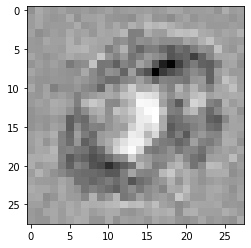

In [5]:
# запустить сеть в обратном направлении, 
# учитывая метку посмотреть какое изображение она производит

# метка для проверки
label = 0

# создать выходной сигнал для этой метки
targets = numpy.zeros(output_nodes) + 0.01

# all_values[0] это целевая метка для этой записи
targets[label] = 0.99
print(targets)

# получение данных изображения
image_data  = n.backquery(targets)

# построение графического изображения
matplotlib.pyplot.imshow(image_data.reshape(28,28), cmap = 'Greys', interpolation = 'None')